In [ ]:
# 상관계수 만들기 OIL PRESENT, 나프타, 황중유, 

In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("화이팅_ㅋ.csv")

In [20]:
df

,주차,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
0,2013-1,1148.08,0.0,1056.49,93.56,106.6980,96.1060
1,2013-2,1232.35,0.0,1058.35,95.56,105.0360,97.7760
2,2013-3,1245.84,0.0,1075.58,95.88,103.4800,97.2140
3,2013-4,1227.84,0.0,1095.19,97.77,106.6620,97.4920
4,2013-5,1219.39,0.0,1096.00,95.72,108.1780,98.5660
...,...,...,...,...,...,...,...
584,2024-15,1757.04,39459.0,1374.30,83.14,74.9875,79.6475
585,2024-16,1769.54,31841.0,1376.43,83.85,74.3400,80.8120
586,2024-17,1940.63,34278.0,1354.63,78.11,75.0220,80.4920
587,2024-19,2305.79,33678.0,1351.76,80.06,71.8160,81.2640


In [21]:
# 날짜를 인덱스로 설정
df.set_index('주차', inplace=True)

In [23]:
df.drop(df.index[563:570], inplace=True)

In [24]:
df

,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
주차,,,,,,
2013-1,1148.08,0.0,1056.49,93.56,106.6980,96.1060
2013-2,1232.35,0.0,1058.35,95.56,105.0360,97.7760
2013-3,1245.84,0.0,1075.58,95.88,103.4800,97.2140
2013-4,1227.84,0.0,1095.19,97.77,106.6620,97.4920
2013-5,1219.39,0.0,1096.00,95.72,108.1780,98.5660
...,...,...,...,...,...,...
2024-15,1757.04,39459.0,1374.30,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,1376.43,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,1354.63,78.11,75.0220,80.4920


In [25]:
df.drop('환율', axis=1, inplace=True)

In [26]:
df

,SCFI,코로나확진자,WTI유가,나프타유가,고유황중유가
주차,,,,,
2013-1,1148.08,0.0,93.56,106.6980,96.1060
2013-2,1232.35,0.0,95.56,105.0360,97.7760
2013-3,1245.84,0.0,95.88,103.4800,97.2140
2013-4,1227.84,0.0,97.77,106.6620,97.4920
2013-5,1219.39,0.0,95.72,108.1780,98.5660
...,...,...,...,...,...
2024-15,1757.04,39459.0,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,78.11,75.0220,80.4920


In [27]:
X = df.drop(['SCFI'],axis=1)
Y = df['SCFI']

In [ ]:
# 데이터 정규화
scaler_X = RobustScaler()
scaled_X = scaler_X.fit_transform(X)

scaler_Y = RobustScaler()
scaled_Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

Epoch 1/100

464/464 [==============================] - 10s 4ms/step - loss: 2.5243 - mae: 0.8178
Epoch 2/100
464/464 [==============================] - 2s 5ms/step - loss: 0.6584 - mae: 0.4925
Epoch 3/100
464/464 [==============================] - 2s 5ms/step - loss: 0.4425 - mae: 0.4126
Epoch 4/100
464/464 [==============================] - 2s 5ms/step - loss: 0.3393 - mae: 0.3800
Epoch 5/100
464/464 [==============================] - 2s 4ms/step - loss: 0.2896 - mae: 0.3675
Epoch 6/100
464/464 [==============================] - 2s 5ms/step - loss: 0.2641 - mae: 0.3409
Epoch 7/100
464/464 [==============================] - 2s 5ms/step - loss: 0.2969 - mae: 0.3672
Epoch 8/100
464/464 [==============================] - 2s 4ms/step - loss: 0.2343 - mae: 0.3449
Epoch 9/100
464/464 [==============================] - 2s 5ms/step - loss: 0.2564 - mae: 0.3415
Epoch 10/100
464/464 [==============================] - 2s 4ms/step - loss: 0.2666 - mae: 0.3527
Epoch 11/100
464/464 [===============

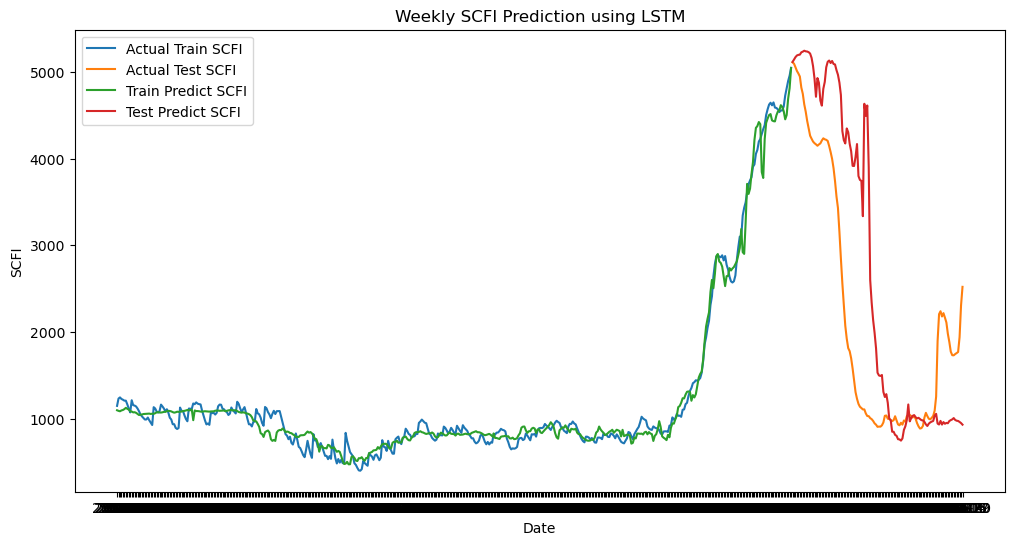

In [31]:

# 데이터셋을 훈련 및 테스트 세트로 분할
train_size = int(len(scaled_X) * 0.8)
test_size = len(scaled_X) - train_size
X_train, X_test = scaled_X[:train_size], scaled_X[train_size:]
Y_train, Y_test = scaled_Y[:train_size], scaled_Y[train_size:]

# LSTM 입력 형태로 데이터 변환 [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM 모델 생성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

# 모델 훈련
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=1)

# 모델 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측 데이터 역정규화
train_predict = scaler_Y.inverse_transform(train_predict)
test_predict = scaler_Y.inverse_transform(test_predict)

# 실제 데이터 역정규화
Y_train_actual = scaler_Y.inverse_transform(Y_train)
Y_test_actual = scaler_Y.inverse_transform(Y_test)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(Y_train_actual)], Y_train_actual, label='Actual Train SCFI')
plt.plot(df.index[len(Y_train_actual):(len(Y_train_actual) + len(Y_test_actual))], Y_test_actual, label='Actual Test SCFI')
plt.plot(df.index[:len(train_predict)], train_predict, label='Train Predict SCFI')
plt.plot(df.index[len(train_predict):(len(train_predict) + len(test_predict))], test_predict, label='Test Predict SCFI')
plt.xlabel('Date')
plt.ylabel('SCFI')
plt.title('Weekly SCFI Prediction using LSTM')
plt.legend()
plt.show()


In [3]:
# R2 Score 계산
r2 = r2_score(Y_test_actual, test_predict)
print(f'R2 Score: {r2:.3f}')

NameError: name 'Y_test_actual' is not defined

In [1]:
from sklearn.metrics import mean_absolute_error, r2_score

In [32]:
loss, mae = model.evaluate(X_test,Y_test)
print(f'Test loss:{loss:.3f}')
print(f'Test MAE:{mae:.3f}')

4/4 [==============================] - 2s 5ms/step - loss: 11.9719 - mae: 2.4769
Test loss:11.972
Test MAE:2.477
